# **Pemodelan Data Wisata Perkemahan**

In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from plotly.subplots import make_subplots
from sklearn import ensemble
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [3]:
#Untuk melihat plot interactive, jangan running code ini!
import plotly.io as pio
pio.renderers.default = "png"

# **Persiapan Data**

In [4]:
dat1 = pd.read_csv('datasets/Data_for_modeling.csv')
dat1.tail()

,tahun,kode_kabupaten_kota,nama_kabupaten_kota,jumlah_perkemahan,jumlah_tenaga_kerja,jumlah_wisatawan
183,2020,3275,KOTA BEKASI,0,0.0,0.0
184,2020,3276,KOTA DEPOK,0,0.0,0.0
185,2020,3277,KOTA CIMAHI,1,29.0,304.0
186,2020,3278,KOTA TASIKMALAYA,1,0.0,0.0
187,2020,3279,KOTA BANJAR,0,0.0,0.0


Dataset memiliki beberapa data yang tidak sesuai, misalnya jumlah tenaga kerjanya nol tetapi jumlah wisatawan lebih dari nol , dan juga jumlah perkemahannya nol tetapi jumlah wisatawanya lebih dari nol. Dalam kenyatanya, jika terdapat sejumlah wisatawan di sana pasti ada tempat wisatanya dan juga tenaga kerjanya. Sehingga, kita harus memoperbaiki masalah ini dengan melakukan sedikit manipulasi data agar nantinya kita memperoleh model yang baik.

## **Manipulasi Data**

### 1. Jumlah tenaga kerja sama dengan nol dan jumlah wisatawan lebih dari nol

In [5]:
null_tk = dat1[(dat1.jumlah_wisatawan > 0) & (dat1.jumlah_tenaga_kerja == 0)].copy()
null_tk.set_index(['tahun', 'kode_kabupaten_kota'], inplace=True)
null_tk

nama_kabupaten_kota  jumlah_perkemahan  \
tahun kode_kabupaten_kota                                             
2017  3206                 KABUPATEN TASIKMALAYA                  2   
2018  3206                 KABUPATEN TASIKMALAYA                  1   
      3216                      KABUPATEN BEKASI                  1   
2019  3208                    KABUPATEN KUNINGAN                  0   
      3216                      KABUPATEN BEKASI                  1   
2020  3202                    KABUPATEN SUKABUMI                  9   
      3212                   KABUPATEN INDRAMAYU                  5   
      3213                      KABUPATEN SUBANG                  6   
      3216                      KABUPATEN BEKASI                  0   

                           jumlah_tenaga_kerja  jumlah_wisatawan  
tahun kode_kabupaten_kota                                         
2017  3206                                 0.0           56779.0  
2018  3206                                 0.0             792.0  
      3216                                 0.0            1000.0  
2019  3208                                 0.0           91776.0  
      3216                                 0.0             280.0  
2020  3202                                 0.0             783.0  
      3212                                 0.0             500.0  
      3213                                 0.0             852.0  
      3216                                 0.0             240.0

Mengisi nilai nol jumlah_tenaga_kerja dengan rata-rata jumlah tenaga kerja berdasarkan tahun.

In [6]:
j = 0
for i in null_tk.index:
    mean = round(dat1[dat1.tahun == null_tk.index.get_level_values('tahun')[j]].jumlah_tenaga_kerja.mean())
    null_tk.loc[i, 'jumlah_tenaga_kerja'] = mean
    j += 1
    
null_tk

nama_kabupaten_kota  jumlah_perkemahan  \
tahun kode_kabupaten_kota                                             
2017  3206                 KABUPATEN TASIKMALAYA                  2   
2018  3206                 KABUPATEN TASIKMALAYA                  1   
      3216                      KABUPATEN BEKASI                  1   
2019  3208                    KABUPATEN KUNINGAN                  0   
      3216                      KABUPATEN BEKASI                  1   
2020  3202                    KABUPATEN SUKABUMI                  9   
      3212                   KABUPATEN INDRAMAYU                  5   
      3213                      KABUPATEN SUBANG                  6   
      3216                      KABUPATEN BEKASI                  0   

                           jumlah_tenaga_kerja  jumlah_wisatawan  
tahun kode_kabupaten_kota                                         
2017  3206                                13.0           56779.0  
2018  3206                                 8.0             792.0  
      3216                                 8.0            1000.0  
2019  3208                                15.0           91776.0  
      3216                                15.0             280.0  
2020  3202                                 3.0             783.0  
      3212                                 3.0             500.0  
      3213                                 3.0             852.0  
      3216                                 3.0             240.0

Memasukan nilai di atas kedalam dat1

In [7]:
dat1.set_index(['tahun', 'kode_kabupaten_kota'], inplace=True)

for i in null_tk.index:
    dat1.loc[i, 'jumlah_tenaga_kerja'] = null_tk.loc[i, 'jumlah_tenaga_kerja']
    
dat1.reset_index(inplace=True)

### 2. Jumlah perkemahan sama dengan nol dan jumlah wisatawan lebih dari nol

In [8]:
null_perkemahan =  dat1[(dat1.jumlah_wisatawan > 0) & (dat1.jumlah_perkemahan == 0)].copy()
null_perkemahan.set_index(['tahun', 'kode_kabupaten_kota'], inplace=True)
null_perkemahan

nama_kabupaten_kota  jumlah_perkemahan  \
tahun kode_kabupaten_kota                                          
2019  3208                 KABUPATEN KUNINGAN                  0   
2020  3207                   KABUPATEN CIAMIS                  0   
      3216                   KABUPATEN BEKASI                  0   

                           jumlah_tenaga_kerja  jumlah_wisatawan  
tahun kode_kabupaten_kota                                         
2019  3208                                15.0           91776.0  
2020  3207                                 3.0           14525.0  
      3216                                 3.0             240.0

Mengisi nilai jumlah_perkemahan dengan rata-rata jumlah_perkemahan berdasarkan tahun.

In [9]:
j = 0
for i in null_perkemahan.index:
    mean = round(dat1[dat1.tahun == null_perkemahan.index.get_level_values('tahun')[j]].jumlah_tenaga_kerja.mean())
    null_perkemahan.loc[i, 'jumlah_perkemahan'] = mean
    j += 1

null_perkemahan

nama_kabupaten_kota  jumlah_perkemahan  \
tahun kode_kabupaten_kota                                          
2019  3208                 KABUPATEN KUNINGAN                 17   
2020  3207                   KABUPATEN CIAMIS                  3   
      3216                   KABUPATEN BEKASI                  3   

                           jumlah_tenaga_kerja  jumlah_wisatawan  
tahun kode_kabupaten_kota                                         
2019  3208                                15.0           91776.0  
2020  3207                                 3.0           14525.0  
      3216                                 3.0             240.0

Memasukan nilai di atas kedalam dat1

In [10]:
dat1.set_index(['tahun', 'kode_kabupaten_kota'], inplace=True)

for i in null_perkemahan.index:
    dat1.loc[i, 'jumlah_perkemahan'] = null_perkemahan.loc[i, 'jumlah_perkemahan']
    
dat1.reset_index(inplace=True)

## **Menggabungkan Data Perkemahan, Covid-19, dan Vaksinasi**

### 1. Menggabungkan data perkemahan dengan data Covid-19

In [11]:
dat1['pertumbuhan_covid19'], dat1['vaksinasi'] = np.zeros(len(dat1)), np.zeros(len(dat1))
dat1.tail()

,tahun,kode_kabupaten_kota,nama_kabupaten_kota,jumlah_perkemahan,jumlah_tenaga_kerja,jumlah_wisatawan,pertumbuhan_covid19,vaksinasi
183,2020,3275,KOTA BEKASI,0,0.0,0.0,0.0,0.0
184,2020,3276,KOTA DEPOK,0,0.0,0.0,0.0,0.0
185,2020,3277,KOTA CIMAHI,1,29.0,304.0,0.0,0.0
186,2020,3278,KOTA TASIKMALAYA,1,0.0,0.0,0.0,0.0
187,2020,3279,KOTA BANJAR,0,0.0,0.0,0.0,0.0


Data perkemahan berakhir di tahun 2020. Sedangkan, data covid-19 dan vaksinasi berakhir di tahun 2021. Oleh karena itu, kita harus menyesuaikan data tersebut dengan cara membuat data perkemahan untuk tahun 2021.

Semenjak Covid-19 melanda Indonesia pada tahun 2020 hampir semua sektor mengalami penurunan yang signifikan terutama dalam industri parawisata. Berdasarkan data, puncak kasus covid-19 terjadi pada tahun 2021 sehingga kita akan membuat data perkemahan pada tahun 2021 berkurang 50% dari tahun 2020.

**Membuat data perkemahan tahun 2021**

In [12]:
data_for_21 = dat1[dat1.tahun == 2020].copy()
data_for_21.tahun.replace(2020, 2021, inplace=True)
data_for_21.jumlah_tenaga_kerja = round(data_for_21.jumlah_tenaga_kerja/2)
data_for_21.jumlah_wisatawan = round(data_for_21.jumlah_wisatawan/2)

In [13]:
dataset = pd.concat([dat1, data_for_21])
dataset.set_index(['tahun', 'kode_kabupaten_kota'], inplace=True)
dataset.tail()

nama_kabupaten_kota  jumlah_perkemahan  \
tahun kode_kabupaten_kota                                          
2021  3275                        KOTA BEKASI                  0   
      3276                         KOTA DEPOK                  0   
      3277                        KOTA CIMAHI                  1   
      3278                   KOTA TASIKMALAYA                  1   
      3279                        KOTA BANJAR                  0   

                           jumlah_tenaga_kerja  jumlah_wisatawan  \
tahun kode_kabupaten_kota                                          
2021  3275                                 0.0               0.0   
      3276                                 0.0               0.0   
      3277                                14.0             152.0   
      3278                                 0.0               0.0   
      3279                                 0.0               0.0   

                           pertumbuhan_covid19  vaksinasi  
tahun kode_kabupaten_kota                                  
2021  3275                                 0.0        0.0  
      3276                                 0.0        0.0  
      3277                                 0.0        0.0  
      3278                                 0.0        0.0  
      3279                                 0.0        0.0

**Memasukan data covid 19 kedalam dataset**

In [14]:
dat2 = pd.read_csv('datasets/covid19_for_modeling.csv')
dat2.tanggal = pd.to_datetime(dat2.tanggal)
dat2.set_index('tanggal', inplace=True)
dat2['tahun'] = dat2.index.year
dat2 = dat2.groupby(['tahun', 'kode_kab_kota']).sum()
dat2.tail()

konfirmasi_total_daily_growth  \
tahun kode_kab_kota                                  
2021  3275                                 80893.0   
      3276                                 93618.0   
      3277                                  9256.0   
      3278                                 11925.0   
      3279                                  4586.0   

                     konfirmasi_aktif_daily_growth  \
tahun kode_kab_kota                                  
2021  3275                                 -2194.0   
      3276                                 -2125.0   
      3277                                    41.0   
      3278                                  -973.0   
      3279                                   -50.0   

                     konfirmasi_sembuh_daily_growth  \
tahun kode_kab_kota                                   
2021  3275                                  82211.0   
      3276                                  93799.0   
      3277                                   9078.0   
      3278                                  12385.0   
      3279                                   4516.0   

                     konfirmasi_meninggal_daily_growth  
tahun kode_kab_kota                                     
2021  3275                                       876.0  
      3276                                      1944.0  
      3277                                       137.0  
      3278                                       513.0  
      3279                                       120.0

In [15]:
for i in dat2.index:
    dataset.loc[i, 'pertumbuhan_covid19'] = dat2.loc[i, 'konfirmasi_total_daily_growth']

dataset.tail()

nama_kabupaten_kota  jumlah_perkemahan  \
tahun kode_kabupaten_kota                                          
2021  3275                        KOTA BEKASI                  0   
      3276                         KOTA DEPOK                  0   
      3277                        KOTA CIMAHI                  1   
      3278                   KOTA TASIKMALAYA                  1   
      3279                        KOTA BANJAR                  0   

                           jumlah_tenaga_kerja  jumlah_wisatawan  \
tahun kode_kabupaten_kota                                          
2021  3275                                 0.0               0.0   
      3276                                 0.0               0.0   
      3277                                14.0             152.0   
      3278                                 0.0               0.0   
      3279                                 0.0               0.0   

                           pertumbuhan_covid19  vaksinasi  
tahun kode_kabupaten_kota                                  
2021  3275                             80893.0        0.0  
      3276                             93618.0        0.0  
      3277                              9256.0        0.0  
      3278                             11925.0        0.0  
      3279                              4586.0        0.0

### 2. **Menggabungkan data perkemahan dengan data vaksinasi (Dosis 1)**

In [16]:
dat3 = pd.read_csv('datasets/vaccine_for_modeling.csv')
dat3.Tanggal = pd.to_datetime(dat3.Tanggal)
dat3.set_index('Tanggal', inplace=True)
dat3['tahun'] = dat3.index.year
dat3 = dat3.groupby(['tahun', 'Kab/kota']).sum()
dat3.tail()

Divaksin 1  Divaksin 2
tahun Kab/kota                                
2021  KOTA CIMAHI           411150      370929
      KOTA CIREBON          274132      211228
      KOTA DEPOK           1281876     1018424
      KOTA SUKABUMI         261072      165025
      KOTA TASIKMALAYA      404831      311640

In [17]:
dataset.reset_index(inplace=True)
dataset.set_index(['tahun', 'nama_kabupaten_kota'], inplace=True)

for i in dat3.index:
    dataset.loc[i, 'vaksinasi'] = dat3.loc[i, 'Divaksin 1']
    
dataset.reset_index(inplace=True)
dataset.drop('kode_kabupaten_kota', axis=1, inplace=True)
dataset.tail()

,tahun,nama_kabupaten_kota,jumlah_perkemahan,jumlah_tenaga_kerja,jumlah_wisatawan,pertumbuhan_covid19,vaksinasi
210,2021,KOTA BEKASI,0,0.0,0.0,80893.0,1684237.0
211,2021,KOTA DEPOK,0,0.0,0.0,93618.0,1281876.0
212,2021,KOTA CIMAHI,1,14.0,152.0,9256.0,411150.0
213,2021,KOTA TASIKMALAYA,1,0.0,0.0,11925.0,404831.0
214,2021,KOTA BANJAR,0,0.0,0.0,4586.0,134144.0


In [18]:
print('Jumlah data {:d} baris dan {:d} kolom'.format(dataset.shape[0], dataset.shape[1]))

Jumlah data 215 baris dan 7 kolom


# **Visualisasi**

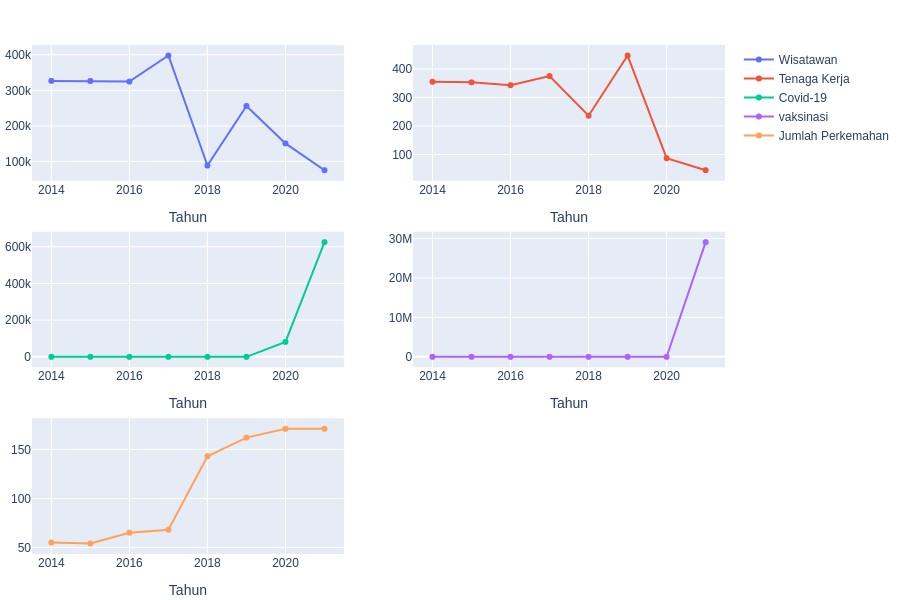

In [19]:
dat_vis = dataset.groupby('tahun').sum().reset_index()

fig = make_subplots(rows=3, cols=2, shared_yaxes=False)

fig.add_trace(go.Scatter(x=dat_vis.tahun,
                         y=dat_vis.jumlah_wisatawan,
                         name='Wisatawan'),1, 1)

fig.add_trace(go.Scatter(x=dat_vis.tahun,
                         y=dat_vis.jumlah_tenaga_kerja,
                         name='Tenaga Kerja'), 1, 2)

fig.add_trace(go.Scatter(x=dat_vis.tahun,
                         y=dat_vis.pertumbuhan_covid19,
                         name='Covid-19'),2, 1)

fig.add_trace(go.Scatter(x=dat_vis.tahun,
                         y=dat_vis.vaksinasi,
                         name='vaksinasi'),2, 2)

fig.add_trace(go.Scatter(x=dat_vis.tahun,
                         y=dat_vis.jumlah_perkemahan,
                         name='Jumlah Perkemahan'),3, 1)

fig.update_xaxes(title_text="Tahun", row=1, col=1)
fig.update_xaxes(title_text="Tahun", row=1, col=2)
fig.update_xaxes(title_text="Tahun", row=2, col=1)
fig.update_xaxes(title_text="Tahun", row=2, col=2)
fig.update_xaxes(title_text="Tahun", row=3, col=1)

fig.update_layout(margin={"r":5,"t":45,"l":5,"b":5},
                  width=100*9, height=100*6)

fig.show()

### **Grafik Korelasi**

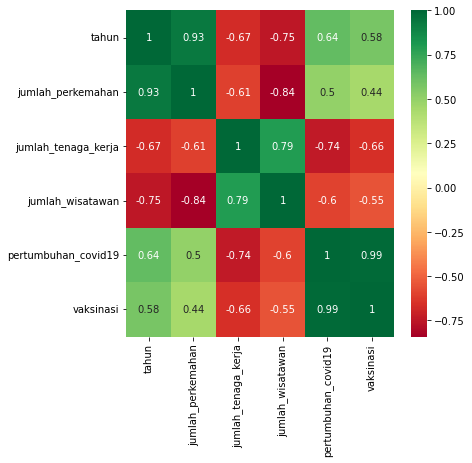

In [20]:
plt.figure(figsize=(6, 6))
sns.heatmap(dat_vis.corr(), annot=True, cmap='RdYlGn')
plt.show()

# **Pembangunan dan Pelatihan Model**

**One Hot Encoding**

Mengubah label nama kabupaten/kota menjadi fitur pelatihan dengan nilai biner.

In [21]:
data_train = dataset.copy()
data_train = pd.get_dummies(data_train, columns=['nama_kabupaten_kota'], prefix='', prefix_sep='')
data_train.head()

,tahun,jumlah_perkemahan,jumlah_tenaga_kerja,jumlah_wisatawan,pertumbuhan_covid19,vaksinasi,KABUPATEN BANDUNG,KABUPATEN BANDUNG BARAT,KABUPATEN BEKASI,KABUPATEN BOGOR,...,KABUPATEN TASIKMALAYA,KOTA BANDUNG,KOTA BANJAR,KOTA BEKASI,KOTA BOGOR,KOTA CIMAHI,KOTA CIREBON,KOTA DEPOK,KOTA SUKABUMI,KOTA TASIKMALAYA
0,2014,4,15.0,16971.0,0.0,0.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2014,7,37.0,109815.0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2014,2,16.0,6391.0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2014,6,12.0,28276.0,0.0,0.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2014,11,0.0,0.0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
print('Total data pelatihan: {:d} baris dan {:d} kolom'.format(data_train.shape[0], data_train.shape[1]))

Total data pelatihan: 215 baris dan 33 kolom


**Membangun dan Melatih Model**

Mengekstrak fitur (x) dan label (y)

In [23]:
x = data_train.copy()
y = x.pop('jumlah_wisatawan')

In [24]:
model = RandomForestRegressor(n_estimators = 100, random_state = 100)
model.fit(x, y)
y_pred = model.predict(x)

In [25]:
true_vs_pred = pd.DataFrame(x.tahun)
true_vs_pred['true'] = y
true_vs_pred['prediction'] = y_pred

true_vs_pred_vis = true_vs_pred.groupby('tahun').sum().reset_index()
true_vs_pred_vis

acc = r2_score(true_vs_pred['true'] , true_vs_pred['prediction'])

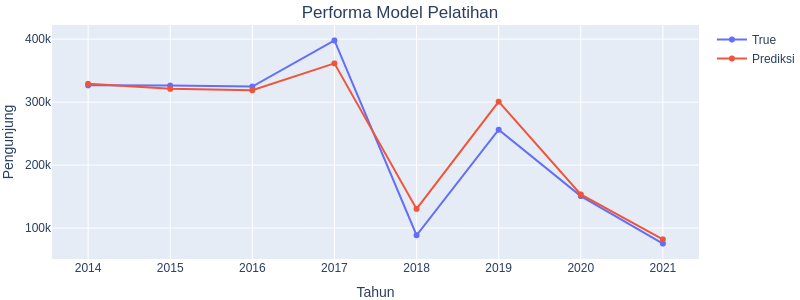


Akurasi: 0.95


In [26]:
fig = go.Figure(data=[
            go.Scatter(x=true_vs_pred_vis.tahun, 
                       y=true_vs_pred_vis.true, 
                       name='True'),
            go.Scatter(x=true_vs_pred_vis.tahun, 
                       y=true_vs_pred_vis.prediction, 
                       name='Prediksi')])
fig.update_layout(title={'text':'Performa Model Pelatihan',
                         'y':0.98, 'x':0.5, 'xanchor':'center', 'yanchor':'top'},
                  xaxis_title='Tahun',
                  yaxis_title='Pengunjung',
                  margin={"r":10,"t":25,"l":0,"b":0},
                  width=100*8, height=100*3)
fig.show()

print('\nAkurasi: {:.2f}'.format(acc))

Dari pelatihan kita mendapatkan akurasi yang sangat baik yaitu sebesar 93%.

## **Prediksi Jumlah Wisatawan Tahun 2022 dan 2023**

### **Asumsi:**

Jika pada tahun 2022:
1. Pertumbuhan covid-19 menurun sebesar 85% dari tahun 2021
2. Jumlah vaksinasi telah mencapai target > 90% 
3. Jumlah tenaga kerja meningkat dua kali lipat dari tahun 2021
4. Ada penambahan jumlah tempat wisata perkemahan baru 

Menyiapkan data pengujian tahun 2022

In [27]:
# Persentase jumlah vaksinasi Jawa Barat tahun 2021
pop_20 = 49935858 # Populasi Jawa Barat Tahun 2021 Sumber BPS
print('Persentase jumlah vaksinasi Jawa Barat tahun 2021 sebesar {:0.2f}%'.format((data_train.vaksinasi.sum()/pop_20)*100))

Persentase jumlah vaksinasi Jawa Barat tahun 2021 sebesar 58.22%


In [28]:
x21 = x[x.tahun == 2021].copy()
x22 = x21.copy()
x22.tahun.replace(2021, 2022, inplace=True)

In [29]:
x22.pertumbuhan_covid19 = round(x21.pertumbuhan_covid19 - x21.pertumbuhan_covid19*0.85)
x22.vaksinasi = round(x21.vaksinasi*0.6)
x22.jumlah_tenaga_kerja = round(x21.jumlah_tenaga_kerja*2)
x22.jumlah_perkemahan = round(x21.jumlah_perkemahan + x21.jumlah_perkemahan*0.07)

In [30]:
print("Jumlah Pertumbuhan Covid-19 \n    2021: {:0.0f} \n    2022: {:0.0f}".format(x21.pertumbuhan_covid19.sum(), x22.pertumbuhan_covid19.sum()))
print("Persentase Vaksinasi \n    2021: {:0.0f}% \n    2022: {:0.0f}%".format((x21.vaksinasi.sum()/pop_20)*100, ((x21.vaksinasi.sum() + x22.vaksinasi.sum())/pop_20)*100))
print("Jumlah Tenaga Kerja \n    2021: {:0.0f} \n    2022: {:0.0f}".format(x21.jumlah_tenaga_kerja.sum(), x22.jumlah_tenaga_kerja.sum()))
print("Jumlah Perkemahan \n    2021: {:0.0f} \n    2022: {:0.0f}".format(x21.jumlah_perkemahan.sum(), x22.jumlah_perkemahan.sum()))

Jumlah Pertumbuhan Covid-19 
    2021: 625250 
    2022: 93791
Persentase Vaksinasi 
    2021: 58% 
    2022: 93%
Jumlah Tenaga Kerja 
    2021: 45 
    2022: 90
Jumlah Perkemahan 
    2021: 171 
    2022: 180


##### Jika pada tahun 2023 telah kembali normal dengan kondisi:
1. Pertumbuhan covid-19 menurun sebesar 99% dari tahun 2022
2. Hampir semua populasi telah di vaksin (vaksinasi 99%)
3. Jumlah tenaga kerja kembali normal (sekitar $\pm$ 400 orang)
4. Ada penambahan jumlah tempat wisata perkemahan baru

Menyiapkan data pengujian untuk tahun 2023

In [31]:
x23 = x22.copy()
x23.tahun.replace(2022, 2023, inplace=True)

In [32]:
x23.pertumbuhan_covid19 = round(x22.pertumbuhan_covid19 - x22.pertumbuhan_covid19*0.99)
x23.vaksinasi = x22.vaksinasi*0.16
x23.jumlah_tenaga_kerja = round(x22.jumlah_tenaga_kerja*4)
x23.jumlah_perkemahan = round(x22.jumlah_perkemahan + x22.jumlah_perkemahan*0.07)

In [33]:
print("Jumlah Pertumbuhan Covid-19 \n    2022: {:0.0f} \n    2023: {:0.0f}".format(x22.pertumbuhan_covid19.sum(), x23.pertumbuhan_covid19.sum()))
print("Persentase Vaksinasi \n    2022: {:0.0f}% \n    2023: {:0.0f}%".format((((x21.vaksinasi.sum() + x22.vaksinasi.sum())/pop_20)*100), ((x21.vaksinasi.sum() + x22.vaksinasi.sum() + x23.vaksinasi.sum())/pop_20)*100))
print("Jumlah Tenaga Kerja \n    2022: {:0.0f} \n    2023: {:0.0f}".format(x22.jumlah_tenaga_kerja.sum(), x23.jumlah_tenaga_kerja.sum()))
print("Jumlah Perkemahan \n    2022: {:0.0f} \n    2023: {:0.0f}".format(x22.jumlah_perkemahan.sum(), x23.jumlah_perkemahan.sum()))

Jumlah Pertumbuhan Covid-19 
    2022: 93791 
    2023: 939
Persentase Vaksinasi 
    2022: 93% 
    2023: 99%
Jumlah Tenaga Kerja 
    2022: 90 
    2023: 360
Jumlah Perkemahan 
    2022: 180 
    2023: 190


# **Prediksi**

In [34]:
x_for_pred = pd.concat([x, x22, x23]).reset_index()
x_for_pred.drop('index', axis=1, inplace=True)

In [35]:
y_pred = model.predict(x_for_pred)
pred = pd.DataFrame(x_for_pred.tahun)
pred['prediction'] = y_pred
pred_vis = pred.groupby('tahun').sum().reset_index()

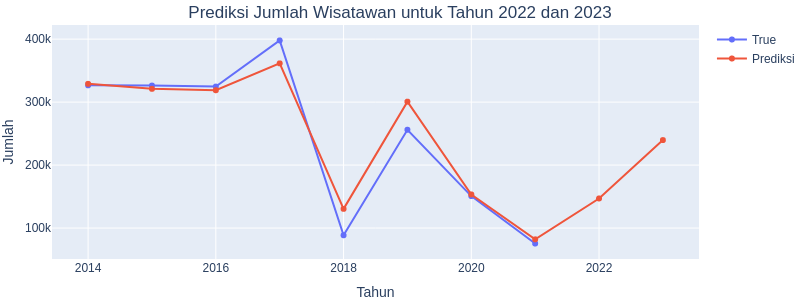

In [36]:
fig = go.Figure(data=[
            go.Scatter(x=true_vs_pred_vis.tahun, 
                       y=true_vs_pred_vis.true, 
                       name='True'),
            go.Scatter(x=pred_vis.tahun, 
                       y=pred_vis.prediction, 
                       name='Prediksi')])
fig.update_layout(title={'text':'Prediksi Jumlah Wisatawan untuk Tahun 2022 dan 2023',
                         'y':0.98, 'x':0.5, 'xanchor':'center', 'yanchor':'top'},
                  xaxis_title='Tahun',
                  yaxis_title='Jumlah',
                  margin={"r":10,"t":25,"l":0,"b":0},
                  width=100*8, height=100*3)
fig.show()